In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

df = pd.read_csv('../dataset/Student_performance.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (6607, 20)


                 count   mean    std  min  max
Study_Category                                
Low (0-2h)           9  65.67  10.21   58   92
Medium (2-4h)       29  61.52   3.59   55   69
High (4-6h)         38  63.13   2.89   56   68
Very High (6+h)   6531  67.29   3.85   57  101


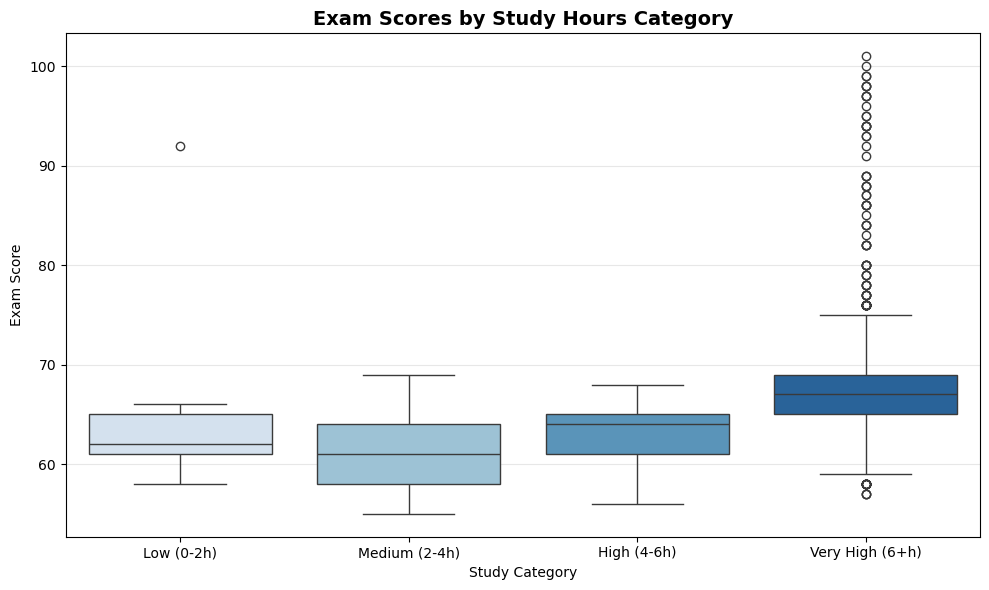

In [4]:
# Create study hour bins
df['Study_Category'] = pd.cut(df['Hours_Studied'], 
                               bins=[0, 2, 4, 6, 100],
                               labels=['Low (0-2h)', 'Medium (2-4h)', 
                                       'High (4-6h)', 'Very High (6+h)'])

# Stats
study_stats = df.groupby('Study_Category',  observed=False)['Exam_Score'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2)
print(study_stats)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Study_Category', y='Exam_Score', hue='Study_Category', palette='Blues', legend=False)
plt.title('Exam Scores by Study Hours Category', fontweight='bold', fontsize=14)
plt.xlabel('Study Category')
plt.ylabel('Exam Score')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('study_hours_impact.png', dpi=300)
plt.show()

                count   mean   std
Sleep_Category                    
Low (<6h)        2380  67.28  3.98
Optimal (6-8h)   3140  67.23  3.84
High (8+h)       1087  67.15  3.85


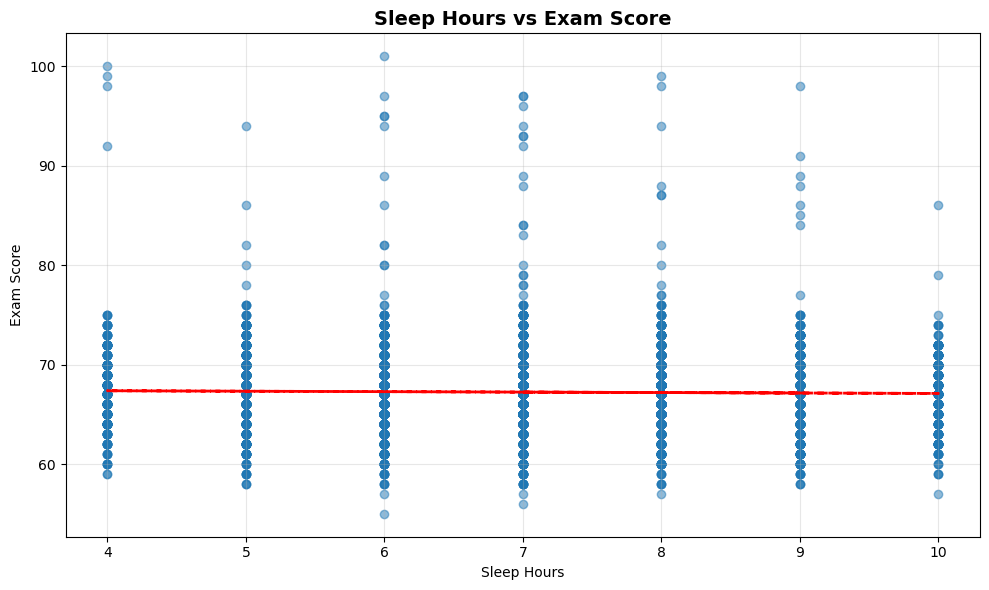

Correlation: -0.017


In [6]:
# Sleep categories
df['Sleep_Category'] = pd.cut(df['Sleep_Hours'],
                               bins=[0, 6, 8, 100],
                               labels=['Low (<6h)', 'Optimal (6-8h)', 'High (8+h)'])

# Stats
sleep_stats = df.groupby('Sleep_Category', observed=False)['Exam_Score'].agg(['count', 'mean', 'std']).round(2)
print(sleep_stats)

# Scatter plot with trend
plt.figure(figsize=(10, 6))
plt.scatter(df['Sleep_Hours'], df['Exam_Score'], alpha=0.5)
z = np.polyfit(df['Sleep_Hours'], df['Exam_Score'], 1)
p = np.poly1d(z)
plt.plot(df['Sleep_Hours'], p(df['Sleep_Hours']), "r--", linewidth=2)
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.title('Sleep Hours vs Exam Score', fontweight='bold', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('sleep_impact.png', dpi=300)
plt.show()

# Correlation
corr = df['Sleep_Hours'].corr(df['Exam_Score'])
print(f"Correlation: {corr:.3f}")

            Exam_Score                      Hours_Studied Access_to_Resources  \
                 count       mean       std          mean            <lambda>   
School_Type                                                                     
Private           2009  67.287705  3.848844     19.972623              Medium   
Public            4598  67.212919  3.908697     19.976512              Medium   

            Teacher_Quality  
                   <lambda>  
School_Type                  
Private              Medium  
Public               Medium  


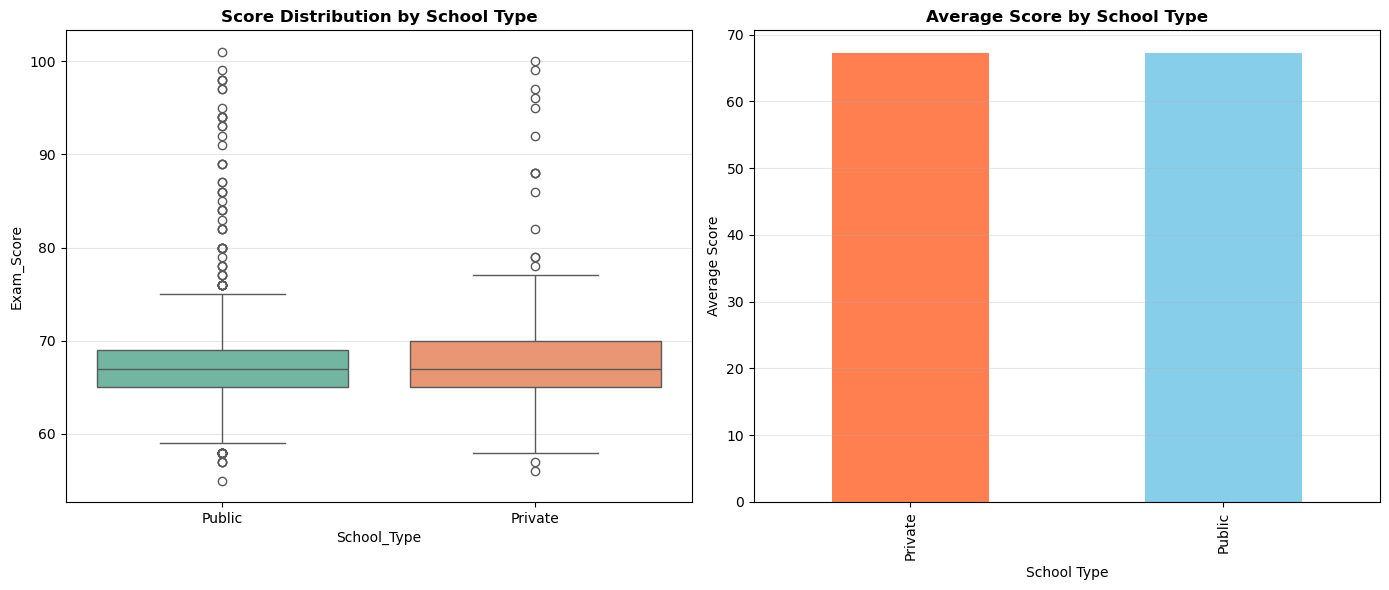

In [10]:
# Stats by school type
# school_stats = df.groupby('School_Type').agg({
#     'Exam_Score': ['count', 'mean', 'std'],
#     'Hours_Studied': 'mean',
#     'Access_to_Resources': 'mean',
#     'Teacher_Quality': 'mean'
# }).round(2)
school_stats = df.groupby('School_Type').agg({
    'Exam_Score': ['count', 'mean', 'std'],
    'Hours_Studied': 'mean',
    'Access_to_Resources': lambda x: x.mode().iloc[0],
    'Teacher_Quality': lambda x: x.mode().iloc[0]
})
print(school_stats)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
sns.boxplot(data=df, x='School_Type', y='Exam_Score', hue='School_Type', ax=axes[0], palette='Set2')
axes[0].set_title('Score Distribution by School Type', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Mean comparison
df.groupby('School_Type')['Exam_Score'].mean().plot(kind='bar', ax=axes[1], color=['coral', 'skyblue'])
axes[1].set_title('Average Score by School Type', fontweight='bold')
axes[1].set_ylabel('Average Score')
axes[1].set_xlabel('School Type')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('school_type_comparison.png', dpi=300)
plt.show()

Motivation levels: ['Low' 'Medium' 'High']
                  count   mean   std
Motivation_Level                    
High               1319  67.70  3.88
Medium             3351  67.33  3.83
Low                1937  66.75  3.96


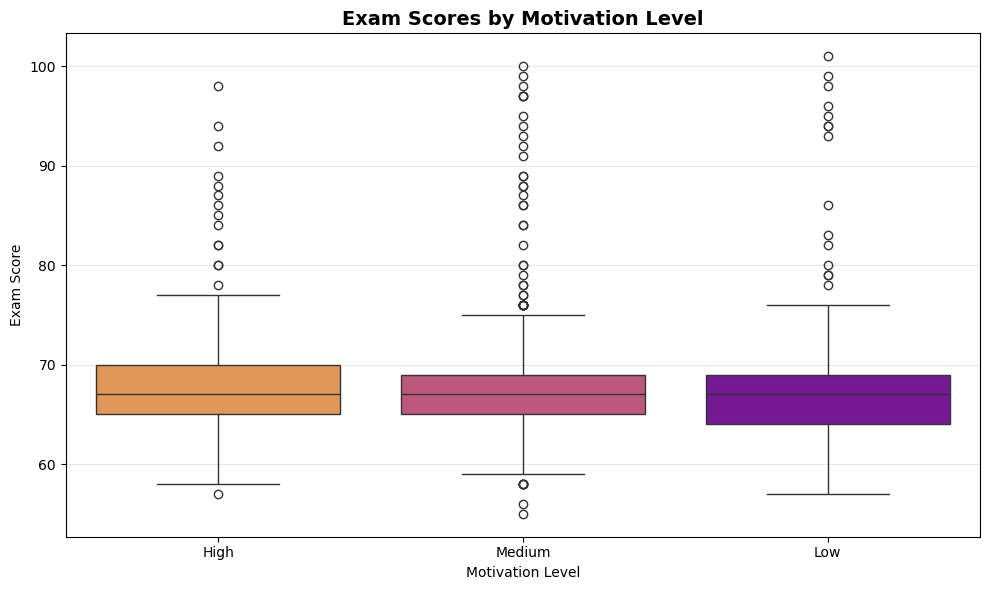

In [11]:
# Check unique values
print("Motivation levels:", df['Motivation_Level'].unique())

# Stats
motivation_stats = df.groupby('Motivation_Level')['Exam_Score'].agg([
    'count', 'mean', 'std'
]).round(2).sort_values('mean', ascending=False)
print(motivation_stats)

# Visualization
plt.figure(figsize=(10, 6))
order = df.groupby('Motivation_Level')['Exam_Score'].mean().sort_values(ascending=False).index
sns.boxplot(data=df, x='Motivation_Level', y='Exam_Score',hue='Motivation_Level', order=order, palette='plasma')
plt.title('Exam Scores by Motivation Level', fontweight='bold', fontsize=14)
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('motivation_impact.png', dpi=300)
plt.show()

Resource access levels: ['High' 'Medium' 'Low']
                    Exam_Score              Tutoring_Sessions Family_Income
                         count   mean   std              mean      <lambda>
Access_to_Resources                                                        
High                      1975  68.09  3.95              1.47           Low
Low                       1313  66.20  3.56              1.51        Medium
Medium                    3319  67.13  3.87              1.50        Medium


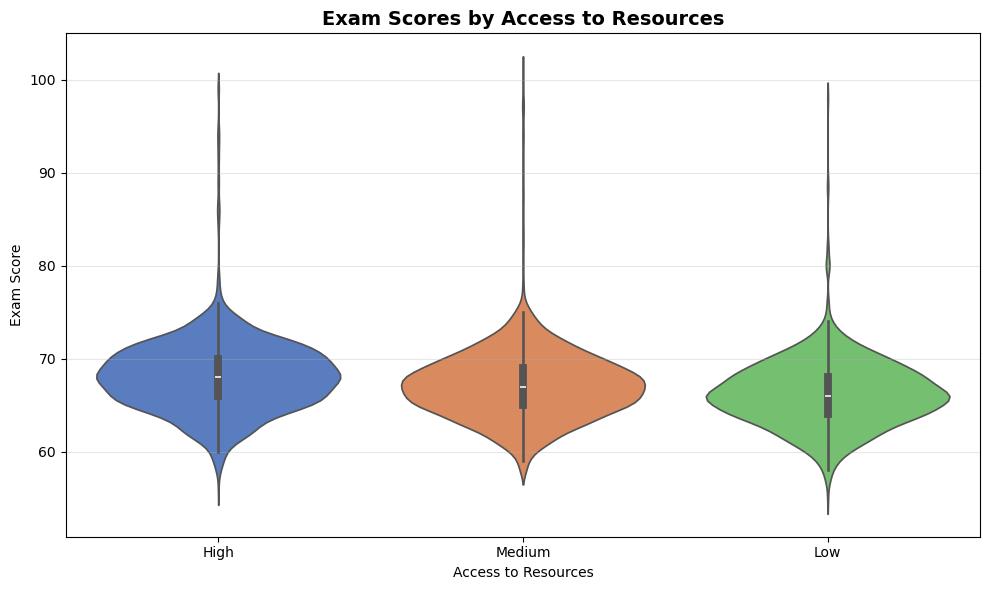

In [14]:
# Check values
print("Resource access levels:", df['Access_to_Resources'].unique())

resource_stats = df.groupby('Access_to_Resources').agg({
    'Exam_Score': ['count', 'mean', 'std'],
    'Tutoring_Sessions': 'mean',
    'Family_Income': lambda x: x.mode()[0]
}).round(2)
print(resource_stats)

# Visualization
order = df.groupby('Access_to_Resources')['Exam_Score'].mean().sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Access_to_Resources', y='Exam_Score',hue='Access_to_Resources', order=order, palette='muted')
plt.title('Exam Scores by Access to Resources', fontweight='bold', fontsize=14)
plt.xlabel('Access to Resources')
plt.ylabel('Exam Score')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('resources_impact.png', dpi=300)
plt.show()

                   count   mean   std
Tutoring_Sessions                    
0                   1513  66.49  3.88
1                   2179  66.98  3.85
2                   1649  67.57  3.85
3                    836  67.89  3.65
4                    301  68.23  3.65
5                    103  69.07  4.78
6                     18  71.67  4.20
7                      7  69.86  4.10
8                      1  69.00   NaN


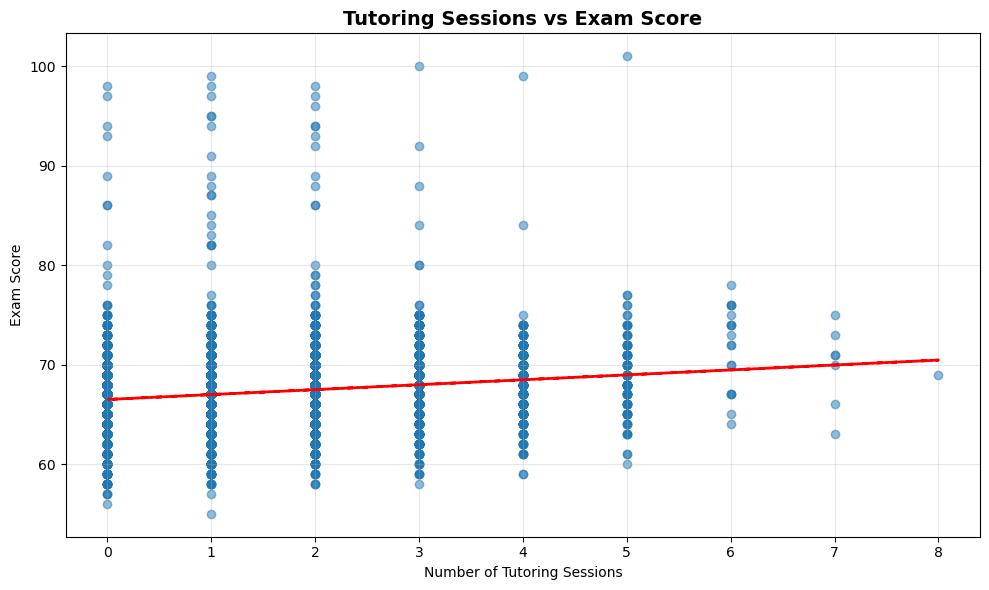

Correlation: 0.157


In [15]:
# Stats
tutoring_stats = df.groupby('Tutoring_Sessions')['Exam_Score'].agg([
    'count', 'mean', 'std'
]).round(2)
print(tutoring_stats)

# Scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['Tutoring_Sessions'], df['Exam_Score'], alpha=0.5)
z = np.polyfit(df['Tutoring_Sessions'], df['Exam_Score'], 1)
p = np.poly1d(z)
plt.plot(df['Tutoring_Sessions'], p(df['Tutoring_Sessions']), "r--", linewidth=2)
plt.xlabel('Number of Tutoring Sessions')
plt.ylabel('Exam Score')
plt.title('Tutoring Sessions vs Exam Score', fontweight='bold', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('tutoring_impact.png', dpi=300)
plt.show()

corr = df['Tutoring_Sessions'].corr(df['Exam_Score'])
print(f"Correlation: {corr:.3f}")


                 count   mean   std
Internet_Access                    
No                 499  66.54  4.12
Yes               6108  67.29  3.87


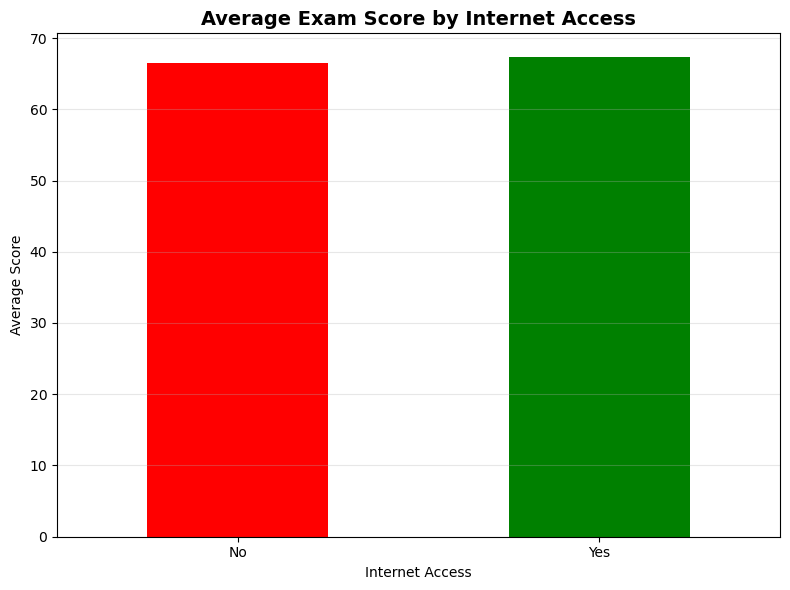

In [16]:
internet_stats = df.groupby('Internet_Access')['Exam_Score'].agg([
    'count', 'mean', 'std'
]).round(2)
print(internet_stats)

plt.figure(figsize=(8, 6))
df.groupby('Internet_Access')['Exam_Score'].mean().plot(kind='bar', color=['red', 'green'])
plt.title('Average Exam Score by Internet Access', fontweight='bold', fontsize=14)
plt.xlabel('Internet Access')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('internet_access_impact.png', dpi=300)
plt.show()

## Day 6 Analysis - Key Findings

### Study Hours Impact
- **Low (0-2h) average:** [fill from output]
- **Very High (6+h) average:** [fill from output]
- **Improvement:** [calculate %]
- **Insight:** [your observation]

### Sleep Hours
- **Optimal range:** [which category scored best?]
- **Correlation:** [from output]
- **Insight:** [does more sleep = better scores?]

### School Type
- **Better performing:** [Public or Private?]
- **Score difference:** [calculate]
- **Why?** [look at resources, teacher quality]

### Motivation
- **Highest scoring motivation:** [from output]
- **Lowest scoring motivation:** [from output]
- **Key finding:** [your insight]

### Attendance
- **Correlation:** [from output]
- **Impact:** [strong/weak?]

### Resources & Tutoring
- **Resource access impact:** [significant/minor?]
- **Tutoring effectiveness:** [positive correlation?]

### Internet Access
- **Score difference:** [with vs without]
- **Modern education factor?** [your thought]